Now we'll work with IMDB dataset

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

d:\Users\churtado\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Let's have a look at the data. Basically, each number is an index for a word in a dictionary of common words. The last parameter in the previous call means we're only taking the 10k most common words.

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

The labels below. They're in binary, so this saves us any processing here. This is a binary classification problem.

In [3]:
train_labels[0]

1

Only the 10k most common words in the dict:

In [4]:
max([max(sequence) for sequence in train_data])

9999

Since we've limited it to 10k words, each review can just be a 10k vector of 1-hot encoded words. So we'll define our function:

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # all zero matrix of that shape
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # set the positions to 1 that need to be set
        results[i, sequence] = 1. #put the decimal point to make sure this is a float
    return results

Let's fix up our data:

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# this was already one-hot encoded into 0-1 (binary), so not much work
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Let's build our network: We'll use 2 hidden layers, densely connected with relu activation functions and a sigmoid output which will map to a [0-1] probability that the input belongs to class=1

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # probability of a positive review

Binary cross-entropy cost functions work best for probability outputs. 

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

We'll take the first 10k rows as a validation set

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Now let's train the model and validate

In [10]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 504us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

Let's analyze the fit

In [11]:
history_dict = history.history
history_dict.keys() # we should have keys for the validation set

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

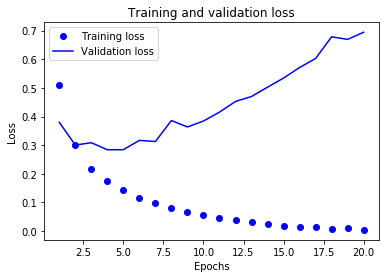

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
history_dict = history.history

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

High loss on validation, low on training. This suggests overfitting.

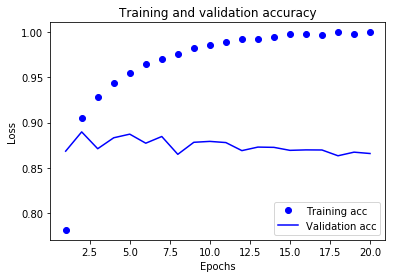

In [14]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Low accuracy on validation and high on training. Again, indicative of overfitting. One thing we can do is to reduce the epochs from 20 to a point where the kpi's are at an optimal level. In this case, it would be 4. Let's retrain our network and have a second look.

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # probability of a positive review

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 145us/step - loss: 0.5326 - acc: 0.7917 - val_loss: 0.4064 - val_acc: 0.8700
Epoch 2/4
15000/15000 [==============================] - 2s 117us/step - loss: 0.3258 - acc: 0.8987 - val_loss: 0.3154 - val_acc: 0.8851
Epoch 3/4
15000/15000 [==============================] - 2s 118us/step - loss: 0.2357 - acc: 0.9245 - val_loss: 0.2827 - val_acc: 0.8899
Epoch 4/4
15000/15000 [==============================] - 2s 117us/step - loss: 0.1866 - acc: 0.9397 - val_loss: 0.2862 - val_acc: 0.8838


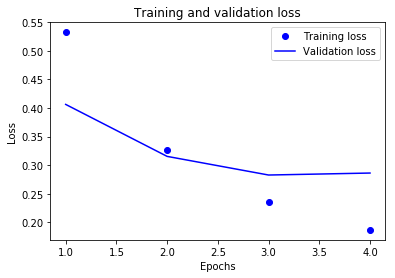

In [16]:
history_dict = history.history

plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

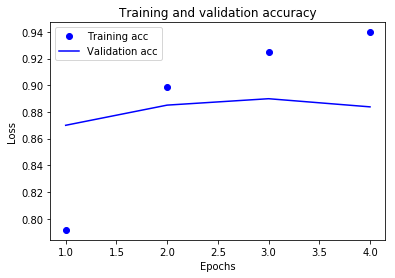

In [17]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Accuracy plateaus at around 88%. Could be higher with other techniques

I realized I had re-trained the same model and got up to 80% loss due to extreme overfitting. Re-creating the network and re-training gave me a better performance. Let's try a prediction on our test set.

In [18]:
print(model.predict(x_test))

[[0.3349126 ]
 [0.9995926 ]
 [0.9345059 ]
 ...
 [0.14445111]
 [0.19112669]
 [0.6551966 ]]


We could also try to make the network smaller, to see if it can generalize better. The idea is that if you decrease the network size, then it will focus on learning the most important features and ignore irrelevant ones.

In [21]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.5367 - acc: 0.7805 - val_loss: 0.4537 - val_acc: 0.8434
Epoch 2/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.3708 - acc: 0.8939 - val_loss: 0.3617 - val_acc: 0.8762
Epoch 3/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.2925 - acc: 0.9183 - val_loss: 0.3207 - val_acc: 0.8822
Epoch 4/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.2414 - acc: 0.9312 - val_loss: 0.2943 - val_acc: 0.8901
Epoch 5/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.2060 - acc: 0.9408 - val_loss: 0.2823 - val_acc: 0.8906
Epoch 6/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.1798 - acc: 0.9476 - val_loss: 0.2766 - val_acc: 0.8903
Epoch 7/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.1582 - acc: 0.9551 - val_loss: 0.2765 - 

The loss curve is less steep than before

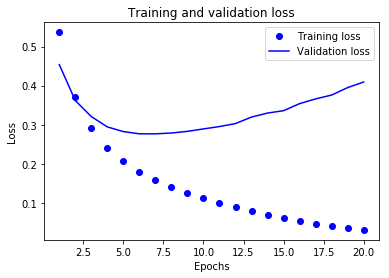

In [22]:
history_dict = history.history

plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

We could also try using weight regularization